# Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Covid data practice 

In [3]:
df=pd.read_csv('districts-new.csv')
df.head()

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,NaN
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN


In [4]:
df.set_index("Date", inplace = True)
df['Cases']=df['Confirmed']-df['Recovered']-df['Deceased']
df=pd.DataFrame(df["Cases"])
df

,Cases
Date,
2020-04-26,22
2020-04-26,35
2020-04-26,60
2020-04-26,27
2020-04-26,177
...,...
2021-06-25,619
2021-06-25,2390
2021-06-25,81


In [5]:
df.index=pd.to_datetime(df.index,format ='%Y-%m-%d') 
df

,Cases
Date,
2020-04-26,22
2020-04-26,35
2020-04-26,60
2020-04-26,27
2020-04-26,177
...,...
2021-06-25,619
2021-06-25,2390
2021-06-25,81


In [6]:
df2 = df['Cases'].resample('D').sum()

In [7]:
df2

Date
2020-04-26     20486
2020-04-27     21416
2020-04-28     22613
2020-04-29     23557
2020-04-30     24654
               ...  
2021-06-21    668952
2021-06-22    649713
2021-06-23    633512
2021-06-24    619474
2021-06-25    622430
Freq: D, Name: Cases, Length: 426, dtype: int64

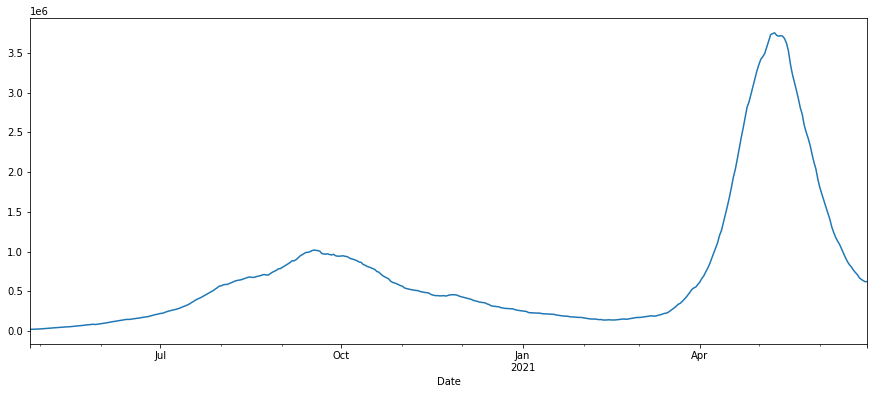

In [8]:
df2.plot(figsize=(15, 6))
plt.show()

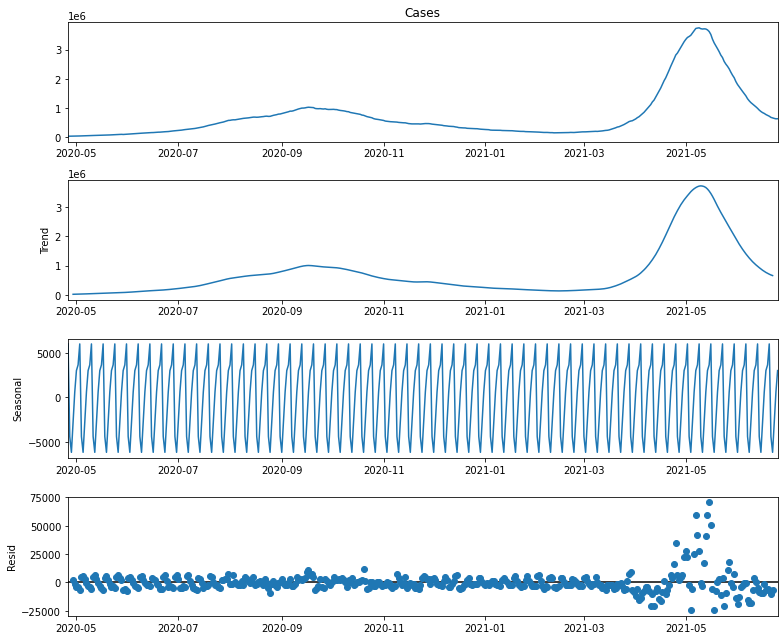

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #to make bigger figure

decomposition = sm.tsa.seasonal_decompose(df2, model='additive')
fig = decomposition.plot()
plt.show()

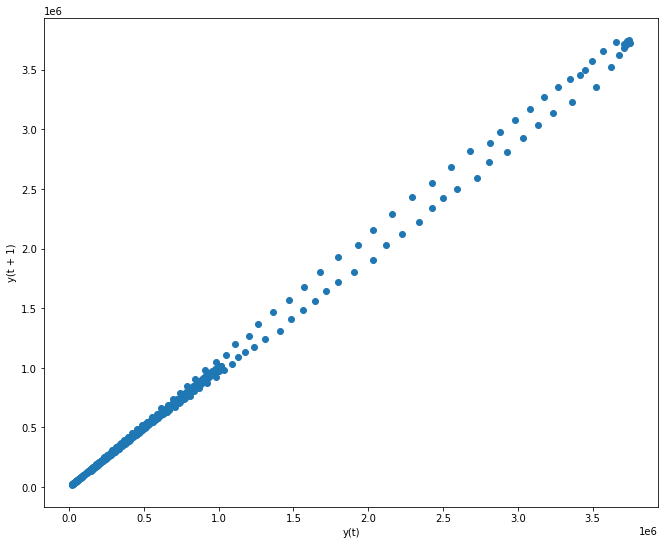

In [10]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(df2)
pyplot.show()

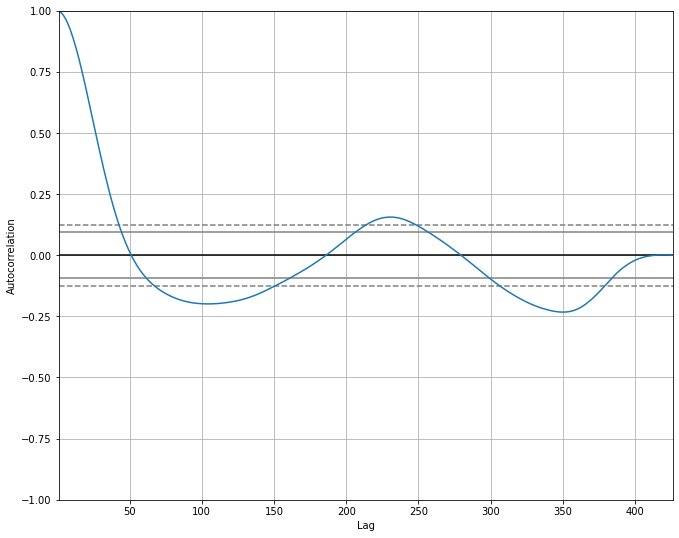

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2)
pyplot.show()

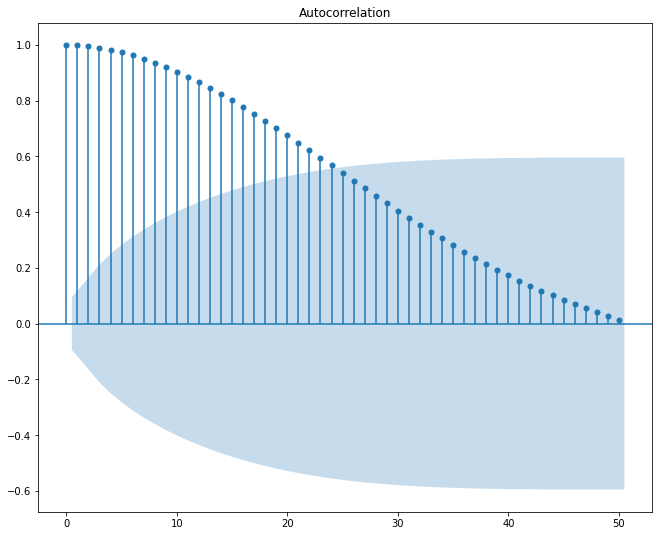

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2, lags=50)
pyplot.show()

In [13]:
from statsmodels.tsa.ar_model import AutoReg

train, test = df2[1:len(df2)-20], df2[len(df2)-20:]

# train autoregression
model = AutoReg(train, lags=11) 
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    1144.059410
Cases.L1        1.742579
Cases.L2       -0.599816
Cases.L3       -0.122271
Cases.L4        0.009432
Cases.L5       -0.035787
Cases.L6        0.004794
Cases.L7        0.649298
Cases.L8       -1.148214
Cases.L9        0.365001
Cases.L10       0.135793
Cases.L11      -0.002240
dtype: float64


c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=1420168.432719, expected=1409373.000000
predicted=1328079.887292, expected=1310204.000000
predicted=1256435.379943, expected=1238413.000000
predicted=1201106.979243, expected=1177135.000000
predicted=1148785.794948, expected=1130241.000000
predicted=1093719.411603, expected=1088134.000000
predicted=1041646.627136, expected=1032695.000000
predicted=999330.309350, expected=980200.000000
predicted=939981.736646, expected=920099.000000
predicted=894687.672727, expected=871998.000000
predicted=861888.403459, expected=833058.000000
predicted=831404.359476, expected=805403.000000
predicted=798804.048597, expected=766669.000000
predicted=768751.646628, expected=736102.000000
predicted=745926.080790, expected=709467.000000
predicted=712518.024727, expected=668952.000000
predicted=688635.927699, expected=649713.000000
predicted=674004.979773, expected=633512.000000
predicted=660993.614992, expected=619474.000000
predicted=646219.348278, expected=622430.000000
Test RMSE: 27698.895


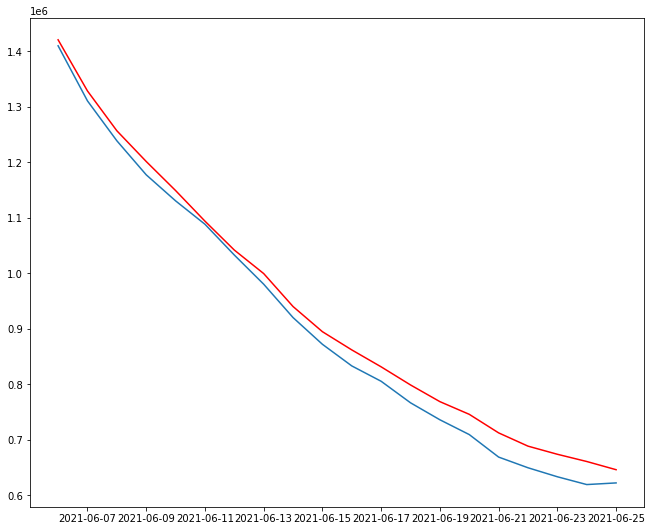

In [15]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

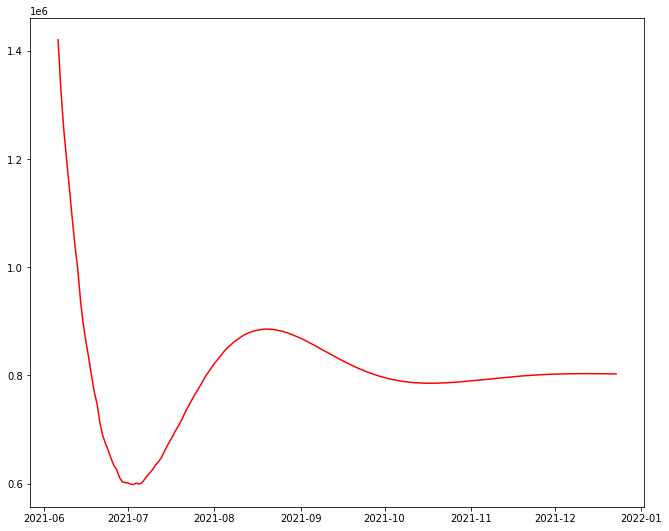

In [16]:
predictions = model_fit.predict(start=len(train), end=len(train)+200, dynamic=False)
pyplot.plot(predictions, color='red')
pyplot.show()

In [17]:
from statsmodels.tsa.stattools import acf, pacf

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


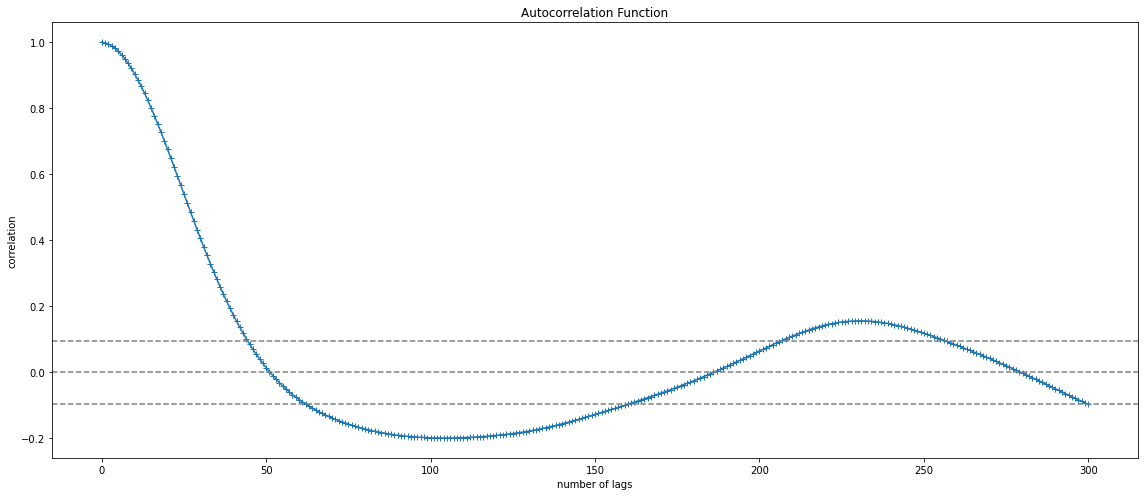

In [18]:
#calling auto correlation function
lag_acf = acf(df2, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

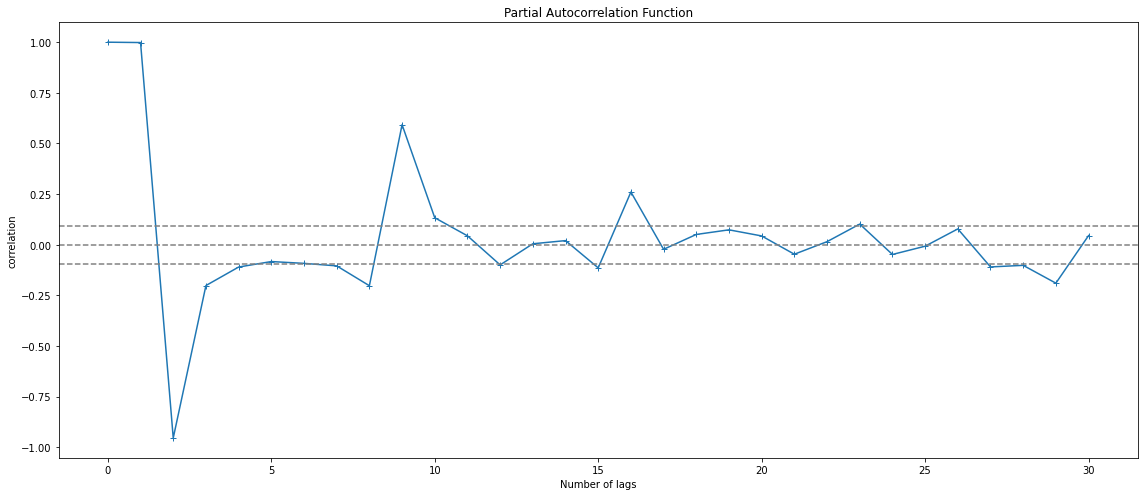

In [19]:
#calling partial correlation function
lag_pacf = pacf(df2, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [59]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(df2, order=(8,0,4))
results = model.fit()
# summary of fit model
print(model_fit.summary())

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Cases   No. Observations:                  426
Model:                ARIMA(10, 2, 5)   Log Likelihood               -4443.242
Date:                Sun, 27 Jun 2021   AIC                           8918.483
Time:                        12:01:58   BIC                           8983.279
Sample:                    04-26-2020   HQIC                          8944.084
                         - 06-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5752      0.245     -2.346      0.019      -1.056      -0.095
ar.L2          0.4027      0.326      1.234      0.217      -0.237       1.043
ar.L3          0.5130      0.229      2.238      0.0

c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\users\nikhil agarwal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


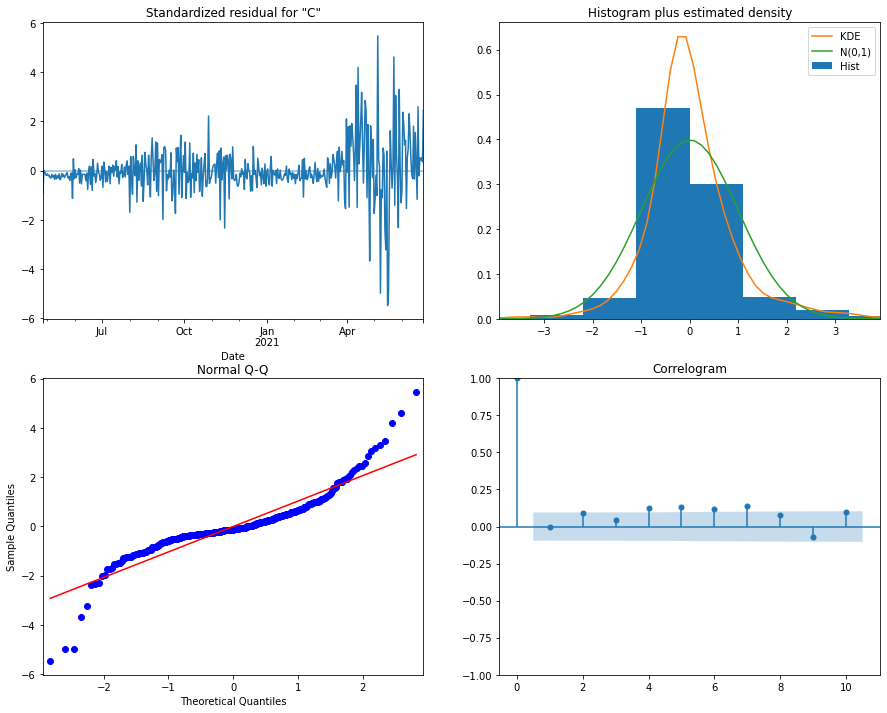

In [60]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [78]:
pred = results.get_prediction(start=pd.to_datetime('5-1-2021'), dynamic=False)
pred_ci = pred.conf_int()

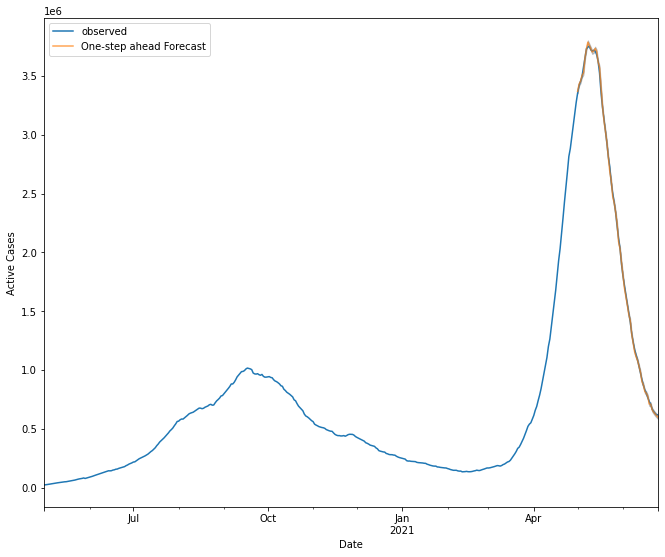

In [79]:
ax = df2['5-1-2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Active Cases')
plt.legend()

plt.show()

In [80]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('05-01-2021'), dynamic=True, full_results=True)
pred_dynamic_ci = pred.conf_int()

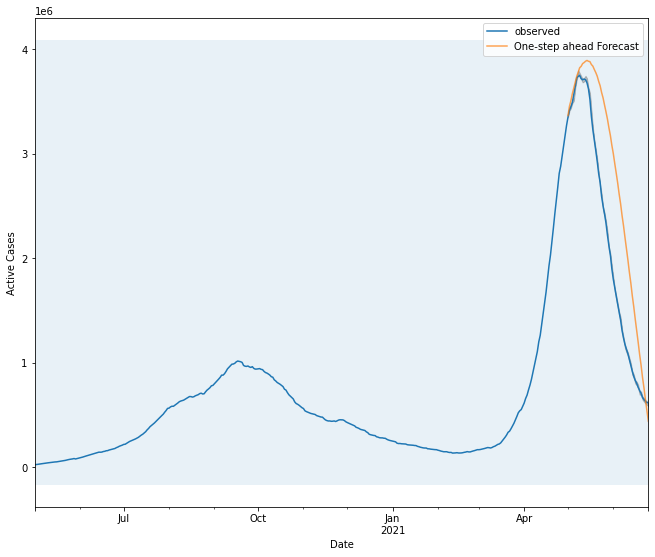

In [81]:
ax = df2['05-01-2020':].plot(label='observed')
pred_dynamic.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('05-01-2020'), df2.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Active Cases')
plt.legend()

plt.show()

In [82]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = df2['05-01-2021':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(sqrt(round(mse, 2))))

The Root Mean Squared Error of our forecasts is 736341.0661845773


In [93]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

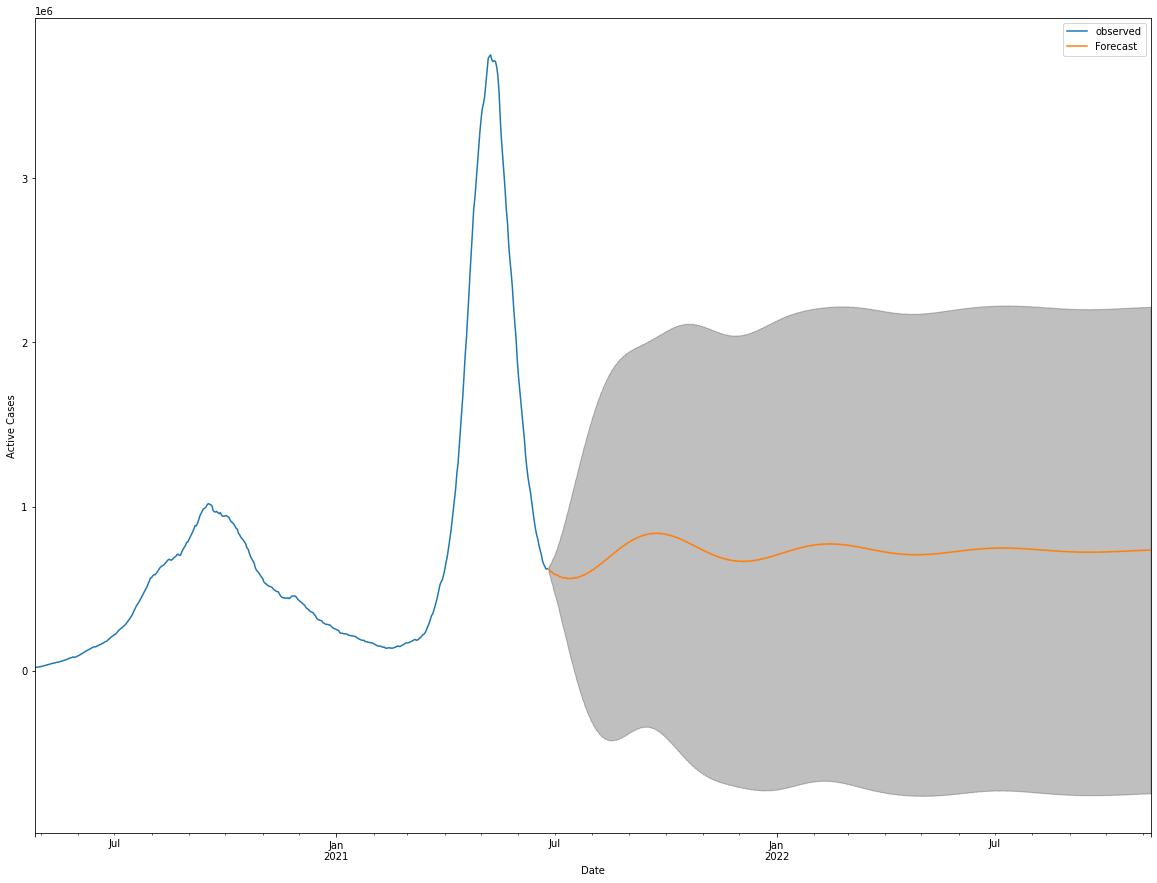

In [94]:
ax = df2.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Active Cases')

plt.legend()
plt.show()

In [58]:
import pmdarima as pm
model = pm.auto_arima(df2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9778.898, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13085.511, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9164.757, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9182.028, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9163.730, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9168.339, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9158.702, Time=0.34 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9166.451, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=9166.820, Time=0.51 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=9120.484, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=9165.617, Time=0.13 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=9160.291, Time=0.76 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=

In [96]:
import pmdarima as pm
model = pm.auto_arima(df2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=3,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[3] intercept   : AIC=9878.520, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=12855.245, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=9498.655, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=12475.757, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=13085.511, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[3] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[3] intercept   : AIC=9869.317, Time=0.44 sec
 ARIMA(1,0,0)(1,0,1)[3] intercept   : AIC=9492.481, Time=0.79 sec
 ARIMA(1,0,0)(0,0,1)[3] intercept   : AIC=9992.390, Time=0.13 sec
 ARIMA(1,0,0)(2,0,1)[3] intercept   : AIC=9868.071, Time=0.72 sec
 ARIMA(1,0,0)(1,0,2)[3] intercept   : AIC=9862.897, Time=0.59 sec
 ARIMA(1,0,0)(0,0,2)[3] intercept   : AIC=9909.074, Time=0.26 sec
 ARIMA(1,0,0)(2,0,2)[3] intercept   : AIC=9864.671, Time=1.17 sec
 ARIMA(0,0,0)(1,0,1)[3] intercept   : AIC=12494.371, Time=0.23 sec
 ARIMA(2,0,0)(1,0,1)[3] intercept 

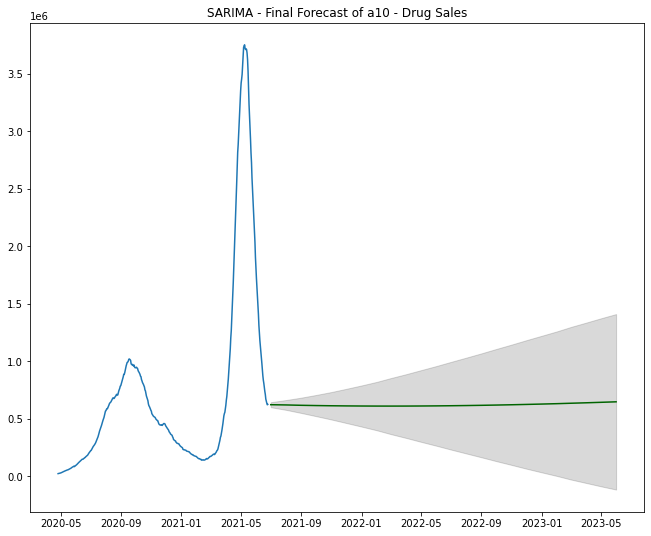

In [97]:
# Forecast
n_periods = 24
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df2.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()